<a href="https://colab.research.google.com/github/salsaagz/OSMnx-python-for-street-network/blob/main/scripts/routing_speed_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Routing, speed imputation, and travel times

Author: [Geoff Boeing](https://geoffboeing.com/)

  - [Overview of OSMnx](http://geoffboeing.com/2016/11/osmnx-python-street-networks/)
  - [GitHub repo](https://github.com/gboeing/osmnx)
  - [Examples, demos, tutorials](https://github.com/gboeing/osmnx-examples)
  - [Documentation](https://osmnx.readthedocs.io/en/stable/)
  - [Journal article/citation](http://geoffboeing.com/publications/osmnx-complex-street-networks/)

In [3]:
# Install & Import Package
!pip install osmnx
import networkx as nx
import osmnx as ox
ox.config(use_cache=True, log_console=True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.9/102.9 kB 2.1 MB/s eta 0:00:00


<ipython-input-3-6c3534710e43>:4: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(use_cache=True, log_console=True)


In [4]:
# Specify Location and Road Type
place = 'Jambi, Jambi, Indonesia'
G = ox.graph_from_place(place, network_type='all')

## 1. Fast nearest node/edge search with OSMnx

In [43]:
# Convert graph to Geodataframes
gdf_edges = ox.graph_to_gdfs(G, nodes=False)

# list of lats and lngs
lngs = gdf_edges.head().centroid.map(lambda x: x.coords[0][0])
lats = gdf_edges.head().centroid.map(lambda x: x.coords[0][1])

# the lat, lng at the spatial center of the graph
lng, lat = gdf_edges.unary_union.centroid.coords[0]
center_point = lng, lat
print(lat,lng)

<ipython-input-43-d674c6af2132>:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  lngs = gdf_edges.head().centroid.map(lambda x: x.coords[0][0])
<ipython-input-43-d674c6af2132>:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  lats = gdf_edges.head().centroid.map(lambda x: x.coords[0][1])


-1.6255410792224667 103.60149525524369


In [45]:
# Find the nearest node to center of the graph
center_node = ox.nearest_nodes(G, lng, lat)
print('Nearest node to center = ' ,center_node)

Nearest node to center =  9057673212


In [47]:
# Find the nearest nodes to a set of points (lngs, lats)
nearest_nodes = ox.nearest_nodes(G, lngs, lats)
print('Nearest nodes to a set of points lngs lats = ', nearest_nodes)

Nearest nodes to a set of points lngs lats =  [6167594764, 3444362556, 6178185682, 6471675616, 2853572914]


In [48]:
# Find the nearest edge to center of the graph
nearest_edge = ox.nearest_edges(G, lng, lat)
print('Nearest edge to center = ', nearest_edge)

Nearest edge to center =  (6130547005, 9057673212, 0)


In [49]:
# Find the nearest edges to some set of points (lngs, lats)
nearest_edges = ox.nearest_edges(G, lngs, lats)
print('Nearest edges to a set of points lngs lats = ', nearest_edges)

Nearest edges to a set of points lngs lats =  [(2853572889, 6167594764, 0), (2853572889, 3444362556, 0), (2853572902, 6178185682, 0), (6471675616, 2853572902, 0), (2853572914, 3195385072, 0)]


## 2. Basic routing by distance

Pick two nodes. Then find the shortest path between origin and destination, using weight='length' to find the shortest path by minimizing distance traveled (otherwise it treats each edge as weight=1).

In [59]:
list(G)[-1]

11461815734

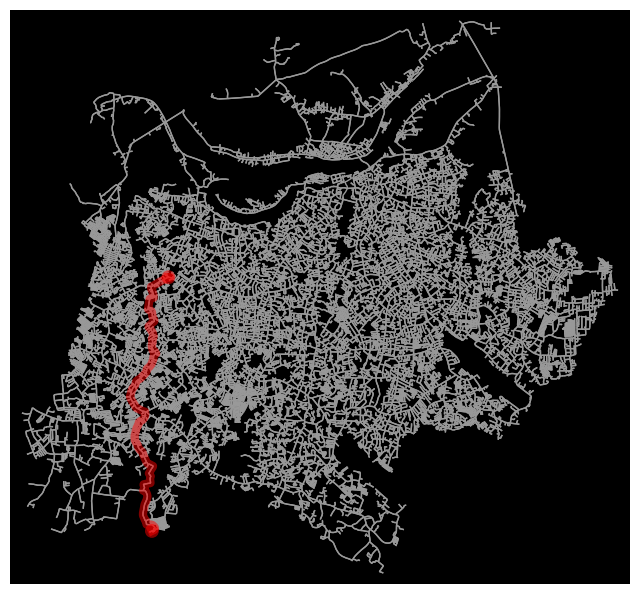

In [21]:
# find the shortest path (by distance) between these nodes then plot it
orig = list(G)[0] #origin node ID
dest = list(G)[-1] #destination node ID
route = nx.shortest_path(G, orig, dest, weight='length')
fig, ax = ox.plot_graph_route(G, route, route_linewidth=6, node_size=0, bgcolor='k')

The routing correctly handles one-way streets:

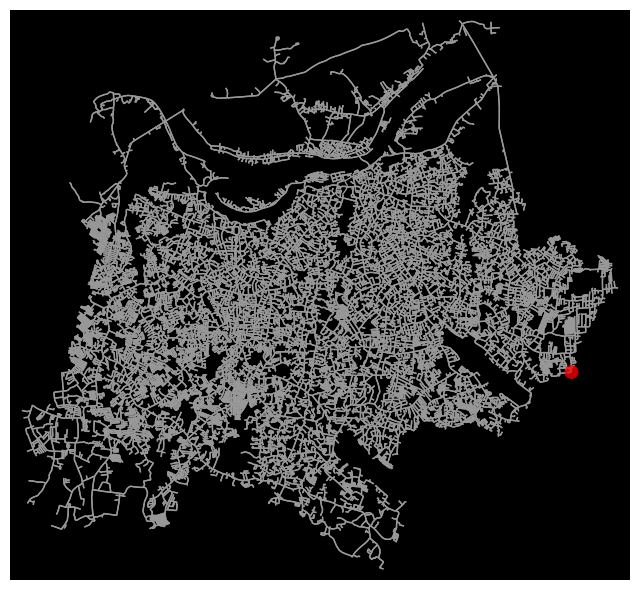

In [80]:
G2 = ox.graph_from_place('Jambi, Jambi, Indonesia', network_type='all')
origin = (-1.625541, 103.601495)
destination = (-1.623953, 103.58570)
origin_node = ox.nearest_nodes(G2, list(origin)[0], list(origin)[1])
destination_node = ox.nearest_nodes(G2, list(destination)[0], list(destination)[1])
route = nx.shortest_path(G2, origin_node, destination_node)
fig, ax = ox.plot_graph_route(G2, route, route_linewidth=6, node_size=0, bgcolor='k')

route = nx.shortest_path(G, orig, dest, weight='length')
fig, ax = ox.plot_graph_route(G, route, route_linewidth=6, node_size=0, bgcolor='k')

Also, when there are parallel edges between nodes in the route, OSMnx picks the shortest edge to plot:

/usr/local/lib/python3.10/dist-packages/osmnx/graph.py:95: UserWarning: The clean_periphery argument has been deprecated and will be removed in a future release. Future behavior will be as though clean_periphery=True.
  G = graph_from_polygon(
/usr/local/lib/python3.10/dist-packages/osmnx/graph.py:95: UserWarning: the graph-level street_count attribute will likely be inaccurate when you set clean_periphery=False
  G = graph_from_polygon(


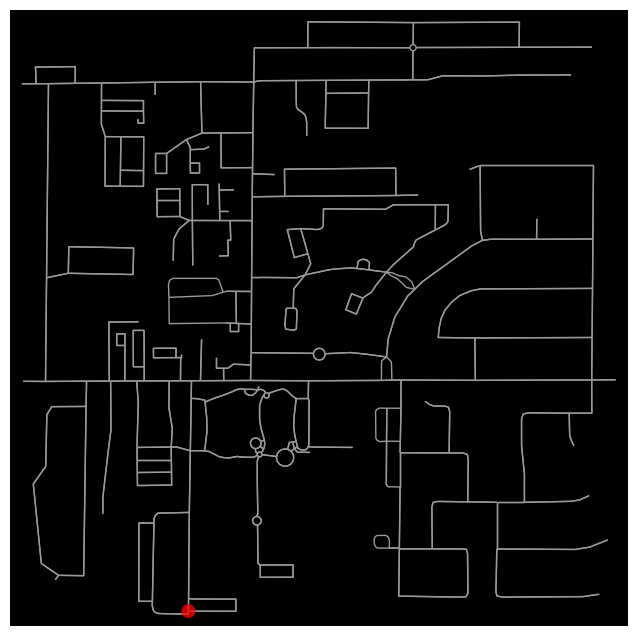

In [68]:
location_point = (33.299896, -111.831638)
G2 = ox.graph_from_point(location_point, dist=500, clean_periphery=False)
origin = (33.301821, -111.829871)
destination = (33.301402, -111.833108)
origin_node = ox.nearest_nodes(G2, list(origin)[0], list(origin)[1])
destination_node = ox.nearest_nodes(G2, list(destination)[0], list(destination)[1])
route = nx.shortest_path(G2, origin_node, destination_node)
fig, ax = ox.plot_graph_route(G2, route, route_linewidth=6, node_size=0, bgcolor='k')

## 3. Imputing travel speeds and times

The `add_edge_speeds` function add edge speeds (km per hour) to graph as new `speed_kph` edge attributes. Imputes free-flow travel speeds for all edges based on mean `maxspeed` value of edges, per highway type. This mean-imputation can obviously be imprecise, and the caller can override it by passing in `hwy_speeds` and/or `fallback` arguments that correspond to local speed limit standards. See docstring for details.

In [22]:
# impute speed on all edges missing data
G = ox.add_edge_speeds(G)

# calculate travel time (seconds) for all edges
G = ox.add_edge_travel_times(G)

In [23]:
# see mean speed/time values by road type
edges = ox.graph_to_gdfs(G, nodes=False)
edges['highway'] = edges['highway'].astype(str)
edges.groupby('highway')[['length', 'speed_kph', 'travel_time']].mean().round(1)

,length,speed_kph,travel_time
highway,,,
"['footway', 'residential']",161.7,47.5,12.3
"['footway', 'steps']",41.6,47.5,3.2
"['living_street', 'footway']",187.1,40.0,16.8
"['living_street', 'path']",92.8,40.0,8.4
"['living_street', 'residential']",159.4,40.0,14.3
"['path', 'residential']",207.5,47.5,15.7
"['pedestrian', 'footway']",607.7,47.5,46.1
"['service', 'footway']",226.0,50.0,16.3
"['service', 'path']",249.9,50.0,18.0


In [81]:
# same thing again, but this time pass in a few default speed values (km/hour)
# to fill in edges with missing `maxspeed` from OSM
hwy_speeds = {'residential': 35,
              'secondary': 50,
              'tertiary': 60}
G = ox.add_edge_speeds(G, hwy_speeds)
G = ox.add_edge_travel_times(G)

In [82]:
# calculate two routes by minimizing travel distance vs travel time
orig = list(G)[1]
dest = list(G)[-1]
route1 = nx.shortest_path(G, orig, dest, weight='length')
route2 = nx.shortest_path(G, orig, dest, weight='travel_time')

In [83]:
# compare the two routes
route1_length = int(sum(ox.utils_graph.get_route_edge_attributes(G, route1, 'length')))
route2_length = int(sum(ox.utils_graph.get_route_edge_attributes(G, route2, 'length')))
route1_time = int(sum(ox.utils_graph.get_route_edge_attributes(G, route1, 'travel_time')))
route2_time = int(sum(ox.utils_graph.get_route_edge_attributes(G, route2, 'travel_time')))
print('Route 1 is', route1_length, 'meters and takes', route1_time, 'seconds.')
print('Route 2 is', route2_length, 'meters and takes', route2_time, 'seconds.')

Route 1 is 9155 meters and takes 760 seconds.
Route 2 is 9817 meters and takes 717 seconds.


<ipython-input-83-943db5b81861>:2: UserWarning: The `get_route_edge_attributes` function has been deprecated and will be removed in a future release. Use the `route_to_gdf` function instead.
  route1_length = int(sum(ox.utils_graph.get_route_edge_attributes(G, route1, 'length')))
<ipython-input-83-943db5b81861>:3: UserWarning: The `get_route_edge_attributes` function has been deprecated and will be removed in a future release. Use the `route_to_gdf` function instead.
  route2_length = int(sum(ox.utils_graph.get_route_edge_attributes(G, route2, 'length')))
<ipython-input-83-943db5b81861>:4: UserWarning: The `get_route_edge_attributes` function has been deprecated and will be removed in a future release. Use the `route_to_gdf` function instead.
  route1_time = int(sum(ox.utils_graph.get_route_edge_attributes(G, route1, 'travel_time')))
<ipython-input-83-943db5b81861>:5: UserWarning: The `get_route_edge_attributes` function has been deprecated and will be removed in a future release. Use 

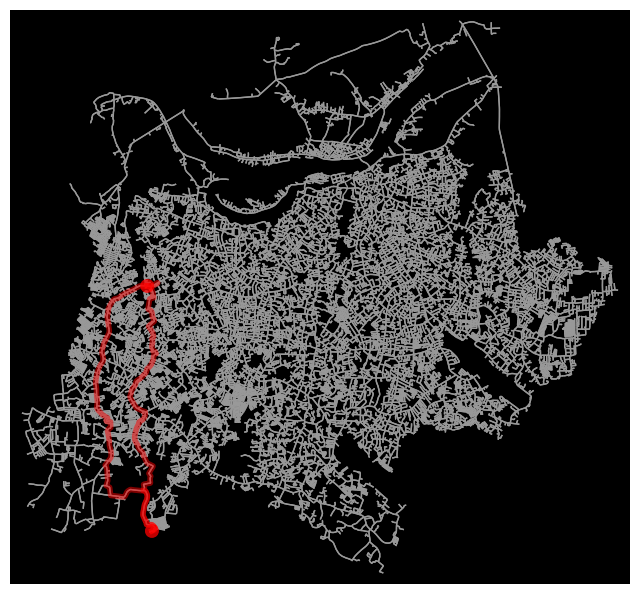

In [84]:
# pick route colors
c1 = 'r' #length
c2 = 'b' #travel_time
rc1 = [c1] * (len(route1) - 1)
rc2 = [c2] * (len(route2) - 1)
rc = rc1 + rc2
nc = [c1, c1, c2, c2]


# plot the routes
fig, ax = ox.plot_graph_routes(G, [route1, route2], route_color=[rc,nc], route_linewidth=6,
                               node_size=0, bgcolor='k')

The blue route minimizes travel time, and is thus longer but faster than the red route.

For more examples of travel time, see the [isochrones example](13-isolines-isochrones.ipynb).

For more examples of routing, including using elevation as an impedance, see the [elevations example](12-node-elevations-edge-grades.ipynb).